In [8]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

In [1]:
PLAYLIST_ID = '3rOYrpv2z54RROlcRnBZZp'

In [3]:
# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [148]:
#get_playlist_tracks('spotify', playlist_id = PLAYLIST_ID)

In [4]:
# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID, limit = 100)

In [70]:
tracks2 = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID, offset = 100, limit = 100)

In [74]:
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

In [75]:
tracks_uri_list2 = [x['track']['uri'] for x in tracks2['items']]

In [130]:
row_track_name_df = pd.DataFrame(columns = ['track_uri','track_name'])

In [132]:
track_name_df.loc[0] = [1,2]

In [136]:
track_name_df

,track_uri,track_name


In [160]:
track_name_df = pd.DataFrame(columns = ['track_uri','track_name'])

for x in tracks['items']:
    row_track_name_df = pd.DataFrame(columns = ['track_uri','track_name'])
    row_track_name_df.loc[0] = [x['track']['uri'], x['track']['name']]
    track_name_df = track_name_df.append(row_track_name_df)

for x in tracks2['items']:
    row_track_name_df = pd.DataFrame(columns = ['track_uri','track_name'])
    row_track_name_df.loc[0] = [x['track']['uri'], x['track']['name']]
    track_name_df = track_name_df.append(row_track_name_df)

In [161]:
track_name_df

,track_uri,track_name
0,spotify:track:5Q0uilamiVtrGSeqVPN9Dn,Freedom
0,spotify:track:0pjCsB0XNSyqM9UazlTODC,Jazz Suite No. 2: VI. Waltz 2
0,spotify:track:4Fook83HYnB77YeERLExXB,Unchained Melody
0,spotify:track:6s9LhJVqxnTjmUJHOeawnU,"City Of Stars - From ""La La Land"" Soundtrack"
0,spotify:track:6qlcjGJPTZEwR8nf2nSe9C,Wildflower
...,...,...
0,spotify:track:6O5GH78mvqGHGatJCI5nVM,Elenore
0,spotify:track:04SU9LZQel0dTMjJJtBmkK,The First Cut Is The Deepest
0,spotify:track:2NPgLm7I9ltBDXE4oigXi6,Shiver - Demo
0,spotify:track:4PNn9pMYbErIXMHmE0w4a2,This Love - Demo


In [76]:
all_uri_list = tracks_uri_list+tracks_uri_list2

In [79]:
len(set(all_uri_list))

200

In [83]:
#tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []   
for i in all_uri_list:
    features = features + sp.audio_features(i)

In [84]:
features_df = pd.DataFrame(features)
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.619,0.362,1,-7.647,0,0.0264,0.5550,0.000001,0.1140,0.144,103.028,audio_features,5Q0uilamiVtrGSeqVPN9Dn,spotify:track:5Q0uilamiVtrGSeqVPN9Dn,https://api.spotify.com/v1/tracks/5Q0uilamiVtr...,https://api.spotify.com/v1/audio-analysis/5Q0u...,260884,4
1,0.322,0.184,0,-18.312,0,0.0338,0.9840,0.902000,0.0813,0.356,107.847,audio_features,0pjCsB0XNSyqM9UazlTODC,spotify:track:0pjCsB0XNSyqM9UazlTODC,https://api.spotify.com/v1/tracks/0pjCsB0XNSyq...,https://api.spotify.com/v1/audio-analysis/0pjC...,193600,4
2,0.422,0.262,2,-12.404,1,0.0309,0.8870,0.794000,0.1680,0.201,102.480,audio_features,4Fook83HYnB77YeERLExXB,spotify:track:4Fook83HYnB77YeERLExXB,https://api.spotify.com/v1/tracks/4Fook83HYnB7...,https://api.spotify.com/v1/audio-analysis/4Foo...,172773,3
3,0.454,0.117,2,-15.121,0,0.0354,0.9060,0.000000,0.0888,0.428,97.692,audio_features,6s9LhJVqxnTjmUJHOeawnU,spotify:track:6s9LhJVqxnTjmUJHOeawnU,https://api.spotify.com/v1/tracks/6s9LhJVqxnTj...,https://api.spotify.com/v1/audio-analysis/6s9L...,149707,4
4,0.644,0.768,6,-4.316,1,0.0455,0.1740,0.000000,0.4690,0.598,108.992,audio_features,6qlcjGJPTZEwR8nf2nSe9C,spotify:track:6qlcjGJPTZEwR8nf2nSe9C,https://api.spotify.com/v1/tracks/6qlcjGJPTZEw...,https://api.spotify.com/v1/audio-analysis/6qlc...,220536,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.627,0.666,4,-6.684,1,0.0378,0.6240,0.000039,0.2750,0.886,122.895,audio_features,6O5GH78mvqGHGatJCI5nVM,spotify:track:6O5GH78mvqGHGatJCI5nVM,https://api.spotify.com/v1/tracks/6O5GH78mvqGH...,https://api.spotify.com/v1/audio-analysis/6O5G...,150773,4
196,0.578,0.786,7,-6.549,1,0.0314,0.0953,0.003030,0.0683,0.697,96.326,audio_features,04SU9LZQel0dTMjJJtBmkK,spotify:track:04SU9LZQel0dTMjJJtBmkK,https://api.spotify.com/v1/tracks/04SU9LZQel0d...,https://api.spotify.com/v1/audio-analysis/04SU...,183133,4
197,0.762,0.613,4,-5.590,0,0.1320,0.0134,0.000008,0.0910,0.704,171.906,audio_features,2NPgLm7I9ltBDXE4oigXi6,spotify:track:2NPgLm7I9ltBDXE4oigXi6,https://api.spotify.com/v1/tracks/2NPgLm7I9ltB...,https://api.spotify.com/v1/audio-analysis/2NPg...,188773,4
198,0.686,0.576,0,-6.775,0,0.0376,0.1820,0.000000,0.1060,0.642,95.940,audio_features,4PNn9pMYbErIXMHmE0w4a2,spotify:track:4PNn9pMYbErIXMHmE0w4a2,https://api.spotify.com/v1/tracks/4PNn9pMYbErI...,https://api.spotify.com/v1/audio-analysis/4PNn...,201867,4


In [164]:
dataset = features_df.merge(track_name_df, left_on = 'uri', right_on = 'track_uri')[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','tempo','track_uri','track_name']]

In [165]:
dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,track_uri,track_name
0,0.619,0.362,1,-7.647,0,0.0264,0.5550,0.000001,0.1140,103.028,spotify:track:5Q0uilamiVtrGSeqVPN9Dn,Freedom
1,0.322,0.184,0,-18.312,0,0.0338,0.9840,0.902000,0.0813,107.847,spotify:track:0pjCsB0XNSyqM9UazlTODC,Jazz Suite No. 2: VI. Waltz 2
2,0.422,0.262,2,-12.404,1,0.0309,0.8870,0.794000,0.1680,102.480,spotify:track:4Fook83HYnB77YeERLExXB,Unchained Melody
3,0.454,0.117,2,-15.121,0,0.0354,0.9060,0.000000,0.0888,97.692,spotify:track:6s9LhJVqxnTjmUJHOeawnU,"City Of Stars - From ""La La Land"" Soundtrack"
4,0.644,0.768,6,-4.316,1,0.0455,0.1740,0.000000,0.4690,108.992,spotify:track:6qlcjGJPTZEwR8nf2nSe9C,Wildflower
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.627,0.666,4,-6.684,1,0.0378,0.6240,0.000039,0.2750,122.895,spotify:track:6O5GH78mvqGHGatJCI5nVM,Elenore
196,0.578,0.786,7,-6.549,1,0.0314,0.0953,0.003030,0.0683,96.326,spotify:track:04SU9LZQel0dTMjJJtBmkK,The First Cut Is The Deepest
197,0.762,0.613,4,-5.590,0,0.1320,0.0134,0.000008,0.0910,171.906,spotify:track:2NPgLm7I9ltBDXE4oigXi6,Shiver - Demo
198,0.686,0.576,0,-6.775,0,0.0376,0.1820,0.000000,0.1060,95.940,spotify:track:4PNn9pMYbErIXMHmE0w4a2,This Love - Demo


In [ ]:
#sp.track('spotify:track:5Q0uilamiVtrGSeqVPN9Dn')

In [17]:
#Creating feature dataframe
cols_to_drop = ['analysis_url', 'key', 'time_signature', 'track_href', 'type', 'uri', 'mode', 'duration_ms']
features_df = pd.DataFrame(features).drop(cols_to_drop, axis=1)

In [12]:
tracks_df = pd.DataFrame(tracks)
tracks_df

,href,items,limit,next,offset,previous,total
0,https://api.spotify.com/v1/playlists/3rOYrpv2z...,"{'added_at': '2021-03-07T04:52:03Z', 'added_by...",100,https://api.spotify.com/v1/playlists/3rOYrpv2z...,0,None,226
1,https://api.spotify.com/v1/playlists/3rOYrpv2z...,"{'added_at': '2021-03-07T04:52:03Z', 'added_by...",100,https://api.spotify.com/v1/playlists/3rOYrpv2z...,0,None,226
2,https://api.spotify.com/v1/playlists/3rOYrpv2z...,"{'added_at': '2021-03-07T04:52:03Z', 'added_by...",100,https://api.spotify.com/v1/playlists/3rOYrpv2z...,0,None,226
3,https://api.spotify.com/v1/playlists/3rOYrpv2z...,"{'added_at': '2021-03-07T04:52:03Z', 'added_by...",100,https://api.spotify.com/v1/playlists/3rOYrpv2z...,0,None,226
4,https://api.spotify.com/v1/playlists/3rOYrpv2z...,"{'added_at': '2021-03-07T04:52:03Z', 'added_by...",100,https://api.spotify.com/v1/playlists/3rOYrpv2z...,0,None,226
...,...,...,...,...,...,...,...
95,https://api.spotify.com/v1/playlists/3rOYrpv2z...,"{'added_at': '2021-03-07T04:52:03Z', 'added_by...",100,https://api.spotify.com/v1/playlists/3rOYrpv2z...,0,None,226
96,https://api.spotify.com/v1/playlists/3rOYrpv2z...,"{'added_at': '2021-03-07T04:52:03Z', 'added_by...",100,https://api.spotify.com/v1/playlists/3rOYrpv2z...,0,None,226
97,https://api.spotify.com/v1/playlists/3rOYrpv2z...,"{'added_at': '2021-03-07T04:52:03Z', 'added_by...",100,https://api.spotify.com/v1/playlists/3rOYrpv2z...,0,None,226
98,https://api.spotify.com/v1/playlists/3rOYrpv2z...,"{'added_at': '2021-03-07T04:52:03Z', 'added_by...",100,https://api.spotify.com/v1/playlists/3rOYrpv2z...,0,None,226


In [15]:
all_features = pd.DataFrame(features)

In [16]:
all_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.619,0.362,1,-7.647,0,0.0264,0.5550,0.000001,0.1140,0.144,103.028,audio_features,5Q0uilamiVtrGSeqVPN9Dn,spotify:track:5Q0uilamiVtrGSeqVPN9Dn,https://api.spotify.com/v1/tracks/5Q0uilamiVtr...,https://api.spotify.com/v1/audio-analysis/5Q0u...,260884,4
1,0.322,0.184,0,-18.312,0,0.0338,0.9840,0.902000,0.0813,0.356,107.847,audio_features,0pjCsB0XNSyqM9UazlTODC,spotify:track:0pjCsB0XNSyqM9UazlTODC,https://api.spotify.com/v1/tracks/0pjCsB0XNSyq...,https://api.spotify.com/v1/audio-analysis/0pjC...,193600,4
2,0.422,0.262,2,-12.404,1,0.0309,0.8870,0.794000,0.1680,0.201,102.480,audio_features,4Fook83HYnB77YeERLExXB,spotify:track:4Fook83HYnB77YeERLExXB,https://api.spotify.com/v1/tracks/4Fook83HYnB7...,https://api.spotify.com/v1/audio-analysis/4Foo...,172773,3
3,0.454,0.117,2,-15.121,0,0.0354,0.9060,0.000000,0.0888,0.428,97.692,audio_features,6s9LhJVqxnTjmUJHOeawnU,spotify:track:6s9LhJVqxnTjmUJHOeawnU,https://api.spotify.com/v1/tracks/6s9LhJVqxnTj...,https://api.spotify.com/v1/audio-analysis/6s9L...,149707,4
4,0.644,0.768,6,-4.316,1,0.0455,0.1740,0.000000,0.4690,0.598,108.992,audio_features,6qlcjGJPTZEwR8nf2nSe9C,spotify:track:6qlcjGJPTZEwR8nf2nSe9C,https://api.spotify.com/v1/tracks/6qlcjGJPTZEw...,https://api.spotify.com/v1/audio-analysis/6qlc...,220536,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.758,0.749,5,-5.985,1,0.2280,0.1480,0.000001,0.3980,0.959,93.547,audio_features,3p6aZiot849Yxl3g4ZuSxr,spotify:track:3p6aZiot849Yxl3g4ZuSxr,https://api.spotify.com/v1/tracks/3p6aZiot849Y...,https://api.spotify.com/v1/audio-analysis/3p6a...,202707,4
96,0.531,0.116,6,-11.157,1,0.0548,0.9340,0.000000,0.0981,0.176,117.469,audio_features,0KQnOjW6AP1LECHd18xjFj,spotify:track:0KQnOjW6AP1LECHd18xjFj,https://api.spotify.com/v1/tracks/0KQnOjW6AP1L...,https://api.spotify.com/v1/audio-analysis/0KQn...,154859,3
97,0.380,0.418,10,-7.179,1,0.0317,0.5690,0.000007,0.3980,0.448,176.427,audio_features,2Vi6ZsNKwx8ASJo7fOZgkJ,spotify:track:2Vi6ZsNKwx8ASJo7fOZgkJ,https://api.spotify.com/v1/tracks/2Vi6ZsNKwx8A...,https://api.spotify.com/v1/audio-analysis/2Vi6...,303227,4
98,0.457,0.950,2,-6.190,1,0.0648,0.0509,0.000002,0.0844,0.207,131.035,audio_features,3DkdzKBXRc1a3JvwkdFhe3,spotify:track:3DkdzKBXRc1a3JvwkdFhe3,https://api.spotify.com/v1/tracks/3DkdzKBXRc1a...,https://api.spotify.com/v1/audio-analysis/3Dkd...,182973,4


In [167]:
dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.531918,0.437770,4.65500,-11.394265,0.725000,0.054825,0.557815,0.188812,0.160297,116.270725
std,0.168731,0.255992,3.42412,6.205449,0.447635,0.041128,0.341124,0.334586,0.129122,30.706467
min,0.097500,0.002650,0.00000,-36.856000,0.000000,0.025400,0.000233,0.000000,0.049300,61.494000
25%,0.413750,0.256000,2.00000,-13.880500,0.000000,0.032900,0.215500,0.000000,0.091375,94.048000
50%,0.526000,0.424000,5.00000,-9.827000,1.000000,0.040600,0.605500,0.000057,0.114000,112.792000
75%,0.659000,0.665000,7.00000,-6.908000,1.000000,0.055625,0.876500,0.231000,0.172000,133.096750
max,0.923000,0.974000,11.00000,-3.180000,1.000000,0.311000,0.996000,0.970000,0.982000,204.520000


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

#data[data.columns] = scaler.fit_transform(data[data.columns])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127380450>,
      dtype=object)

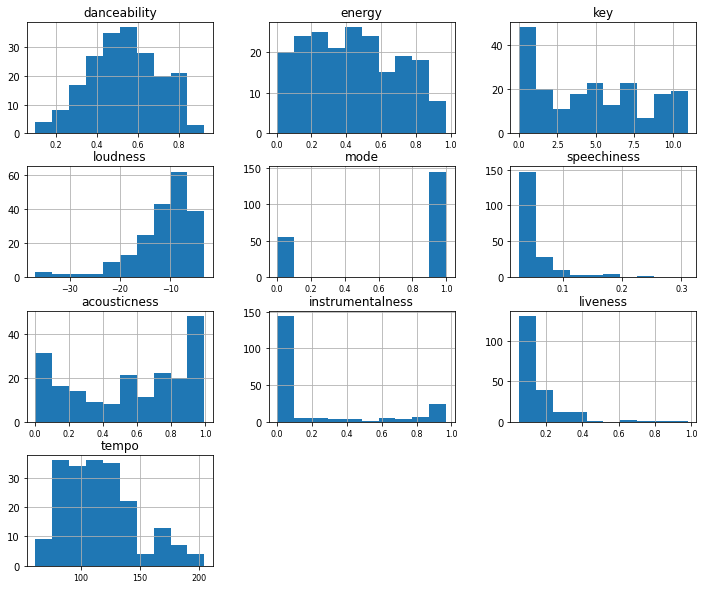

In [168]:
dataset.hist(xlabelsize=8, figsize=(12,10))

In [179]:
dataset.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'track_uri',
       'track_name'],
      dtype='object')

In [180]:
data_to_ml = dataset.drop(columns = ['mode','key','speechiness','instrumentalness'])

In [181]:
data_to_ml.columns

Index(['danceability', 'energy', 'loudness', 'acousticness', 'liveness',
       'tempo', 'track_uri', 'track_name'],
      dtype='object')

(0.0, 6.0)

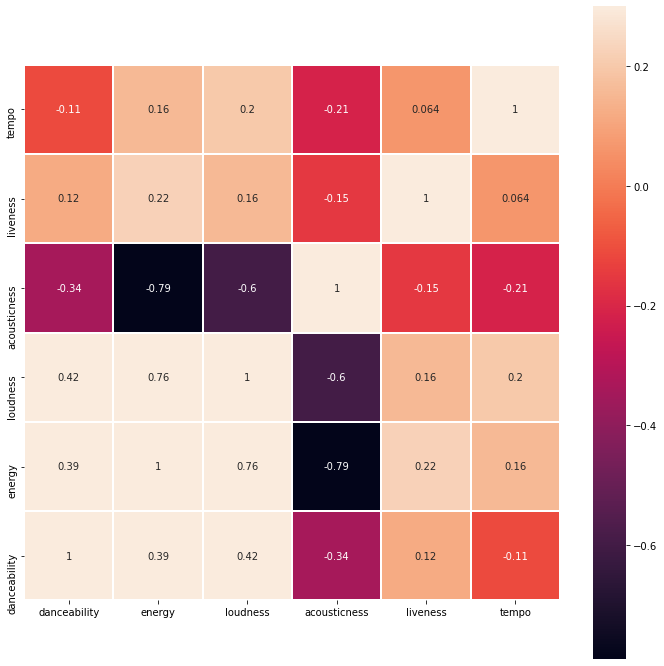

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = data_to_ml.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrMatrix, annot=True, linewidths=1, vmax=.3, square=True)

ax.set_ylim(0,6)

In [198]:
data_to_ml2 = data_to_ml[['tempo','danceability','acousticness']]

In [194]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

data_to_ml2[data_to_ml2.columns] = scaler.fit_transform(data_to_ml2[data_to_ml2.columns])

data_to_ml2

,tempo,liveness,danceability
0,0.290395,0.069369,0.631738
1,0.324088,0.034309,0.271956
2,0.286563,0.127265,0.393095
3,0.253087,0.042350,0.431859
4,0.332093,0.449984,0.662023
...,...,...,...
195,0.429300,0.241986,0.641429
196,0.243536,0.020371,0.582071
197,0.771972,0.044709,0.804967
198,0.240837,0.060791,0.712901


In [195]:
# data wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# for data preprocessing and clustering
from sklearn.cluster import KMeans

%matplotlib inline
# to include graphs inline within the frontends next to code

%config InlineBackend.figure_format='retina'
#to enable retina (high resolution) plots

pd.options.mode.chained_assignment = None
# to bypass warnings in various dataframe assignments

In [197]:
data_to_ml2

,tempo,liveness,danceability
0,0.290395,0.069369,0.631738
1,0.324088,0.034309,0.271956
2,0.286563,0.127265,0.393095
3,0.253087,0.042350,0.431859
4,0.332093,0.449984,0.662023
...,...,...,...
195,0.429300,0.241986,0.641429
196,0.243536,0.020371,0.582071
197,0.771972,0.044709,0.804967
198,0.240837,0.060791,0.712901


In [200]:
import plotly.express as px
fig = px.scatter_3d(data_to_ml2,
                    x='tempo',
                    y='danceability',
                    z='acousticness',
                    #color = 'demand_level',
                    opacity=0.8,
                    size_max=5)
fig.show()

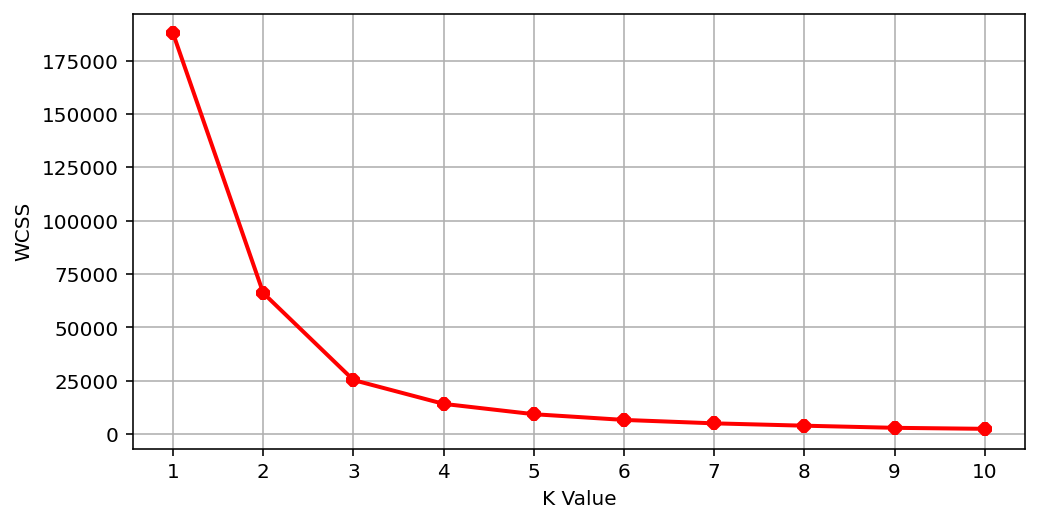

In [203]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data_to_ml2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,4))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [217]:
km = KMeans(n_clusters = 3,
            init='k-means++', 
            max_iter=300, 
            random_state=42)

result = km.fit(data_to_ml2)

clusters = km.fit_predict(data_to_ml2)
data_to_ml2["label"] = clusters

In [218]:
labeled_data = data_to_ml2.merge(dataset['track_name'], left_index = True, right_index = True)

In [219]:
labeled_data.groupby('label').mean()

,tempo,danceability,acousticness
label,,,
0,173.879357,0.431929,0.409092
1,123.450043,0.577359,0.517809
2,87.851487,0.514656,0.655874


In [213]:
labeled_data[labeled_data['label'] == 2].head(50)

,tempo,danceability,acousticness,label,track_name
0,103.028,0.6190,0.55500,2,Freedom
2,102.480,0.4220,0.88700,2,Unchained Melody
3,97.692,0.4540,0.90600,2,"City Of Stars - From ""La La Land"" Soundtrack"
5,94.015,0.5170,0.00140,2,Everybody's Changing
8,81.032,0.5770,0.10900,2,Superman
11,69.149,0.3870,0.99400,2,"Debussy: Suite bergamasque, CD 82, L. 75: III...."
14,80.289,0.4560,0.99600,2,"Satie: 3 Gymnopédies: No. 2, Lent et triste"
15,87.152,0.0975,0.98800,2,Einaudi: Una mattina
16,82.211,0.4240,0.90300,2,Perpetuum Mobile
17,89.567,0.2240,0.97000,2,Flower duet from Lakme - Remasterisé en 1987


In [220]:
import plotly.express as px
fig = px.scatter_3d(data_to_ml2,
                    x='tempo',
                    y='danceability',
                    z='acousticness',
                    color = 'label',
                    opacity=0.8,
                    size_max=5)
fig.show()

In [158]:
labeled_data.groupby('label').label.count()

label
0    20
1    21
2    23
3    30
4     6
Name: label, dtype: int64

In [144]:
clustering = labeled_data.drop(columns = 'id', axis = 1)\
    .groupby('label') \
    .agg('mean')

clustering

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
label,,,,,,,,,,,
0,0.559550,0.662857,0.063636,0.834322,1.000000,0.073589,0.379226,0.014572,0.160073,0.587305,0.457331
1,0.643539,0.724510,0.675325,0.826901,1.000000,0.132885,0.197166,0.041316,0.106719,0.516384,0.482555
2,0.636811,0.498910,0.557312,0.737539,0.000000,0.185321,0.482431,0.000390,0.136914,0.445645,0.393417
3,0.489677,0.301854,0.536364,0.653334,1.000000,0.074026,0.659232,0.017131,0.112957,0.267461,0.403320
4,0.202137,0.084556,0.287879,0.253095,0.666667,0.080693,0.965425,0.940527,0.098848,0.127498,0.368126


In [86]:
two_d_data = labeled_data[['danceability','instrumentalness']]

In [140]:
grouping

<bound method SeriesGroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x1a20f0aa90>>

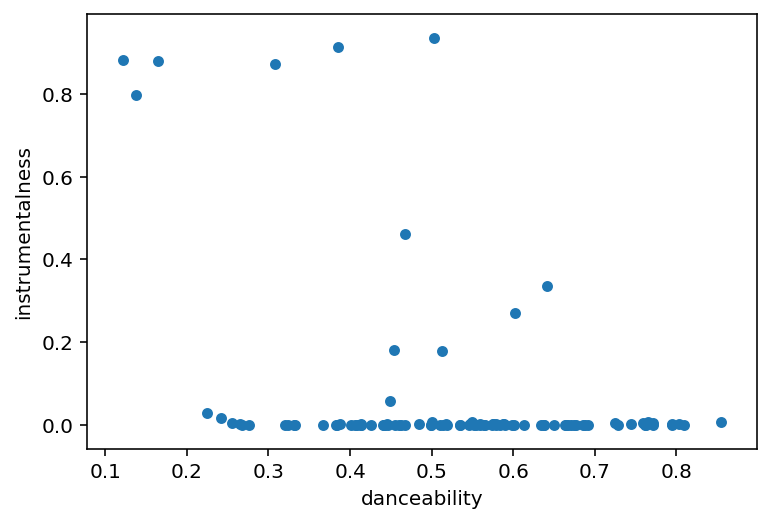

In [93]:
two_d_data.plot(kind='scatter', x='danceability',y='instrumentalness')

In [66]:
# Applying MeanShift Clusterng to the dataset

from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ms = MeanShift()
model = ms.fit(data)
cluster_centers = ms.cluster_centers_

In [63]:
cluster_centers

array([[ 5.78180000e-01,  5.00884000e-01, -9.87558000e+00,
         4.21480000e-02,  4.55933800e-01,  4.91945782e-02,
         1.74984000e-01,  4.17200000e-01,  1.20507820e+02,
         2.76000000e+00],
       [ 5.06696970e-01,  4.52381818e-01, -9.86333333e+00,
         4.84151515e-02,  5.25584242e-01,  6.45793127e-02,
         1.45803030e-01,  3.62233333e-01,  8.77656364e+01,
         1.45454545e+00],
       [ 4.50600000e-01,  4.60300000e-01, -8.33000000e+00,
         8.76300000e-02,  5.54890000e-01,  1.41988000e-04,
         2.58750000e-01,  4.97340000e-01,  1.75439200e+02,
         2.60000000e+00]])

In [64]:
ms_clusters = ms.fit_predict(data)

In [67]:
model

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)